# Super Mario Bros Reinforcement Learning Algorithms

## Setup Mario

In [1]:
# Import the game
import gym_super_mario_bros
# Import the controls
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
# Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplifies the controls, takes out all actions that don't make sense
env = JoypadSpace(env, SIMPLE_MOVEMENT)

Random agent

In [ ]:
# Random agent
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(100000): 
    # Start the game to begin with 
    if done: 
        # Start the game
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

Visualization

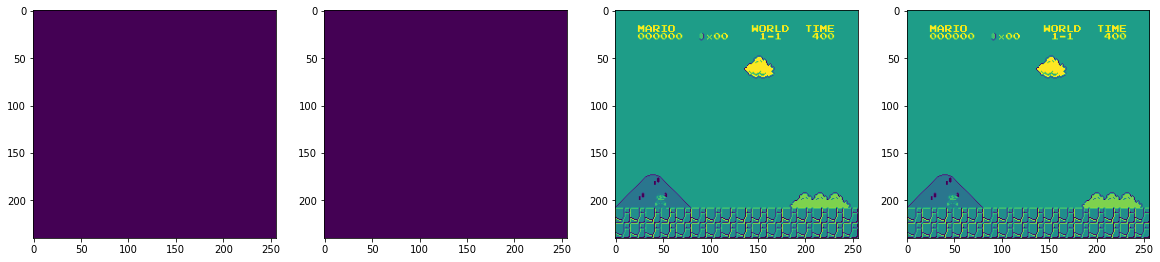

In [5]:

# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')


state = env.reset()

state, reward, done, info = env.step([5])

plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

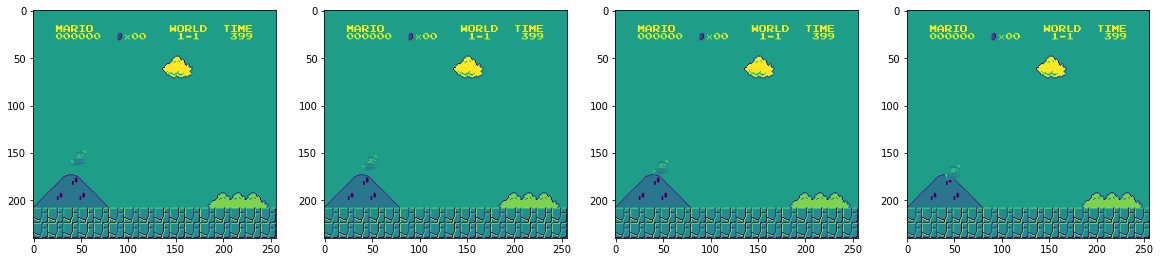

In [43]:
state, reward, done, info = env.step([5])

plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

## Preprocessing

In [2]:
# Wrappers to simplify environment: grayscale
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

In [3]:
# 1. Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# 2. Simplify the controls 
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env, keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda: env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

## Train model

In [4]:
# Import os for file path management
import os 
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [5]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

### PPO

**TODO**: Try different learning rates and other parameters!

In [ ]:
# Import PPO for algos
from stable_baselines3 import PPO

CHECKPOINT_DIR = 'D:/Lina/rl_models/mario_ppo/train/'
LOG_DIR = 'D:/Lina/rl_models/mario_ppo/logs/'

# This is the AI model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

**Result**: Usually makes it past the pipes and falls into holes. Did get a lot better at playing between 3000000 and 4000000 episodes.\
**Time**: 14h30m

### A2C

**TODO**: Try different learning rates and other parameters!

In [ ]:
# Import PPO for algos
from stable_baselines3 import A2C

CHECKPOINT_DIR = 'D:/Lina/rl_models/mario_a2c/train/'
LOG_DIR = 'D:/Lina/rl_models/mario_a2c/logs/'

model = A2C('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

**Result**: Does not get past second or third pipe after 4000000 episodes. Loss goes down but model does not get better at playing, just at jumping more.\
**Time**: 6h19m

### DQN

In [11]:
# Import PPO for algos
from stable_baselines3 import DQN

CHECKPOINT_DIR = 'D:/Lina/rl_models/mario_dqn/train/'
LOG_DIR = 'D:/Lina/rl_models/mario_dqn/logs/'

model = DQN('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            batch_size=32, train_freq=4, gradient_steps=1, exploration_fraction=0.1, exploration_final_eps=0.01, optimize_memory_usage=True, buffer_size=10000)

Using cuda device
Wrapping the env in a VecTransposeImage.


**Result**: Confidently clears pipes after 4000000 episodes. Does not know how to get past hole.\
**Time**: 13h25m

## Learning

In [12]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [13]:
# Train the AI model, this is where the AI model starts to learn
model.learn(total_timesteps=4000000, callback=callback)

Logging to D:/Lina/rl_models/mario_dqn/logs/DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.807    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 192      |
|    time_elapsed     | 405      |
|    total_timesteps  | 77943    |
| train/              |          |
|    learning_rate    | 1e-06    |
|    loss             | 0.175    |
|    n_updates        | 6985     |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.61     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 126      |
|    time_elapsed     | 1242     |
|    total_timesteps  | 157547   |
| train/              |          |
|    learning_rate    | 1e-06    |
|    loss             | 0.148    |
|    n_updates        | 26886    |
----------------------------------
----------------------------------
| rol

## Testing

In [ ]:
# Load model
model = PPO.load(CHECKPOINT_DIR + 'best_model_4000000')

In [ ]:
model = A2C.load(CHECKPOINT_DIR + 'best_model_4000000')

In [ ]:
model = DQN.load(CHECKPOINT_DIR + 'best_model_4000000')

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

C:\Users\loon\.conda\envs\reinforcement_learning\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Der Threadmodus kann nicht nach dem Einstellen geändert werden
  warnings.warn(str(err))


In [ ]:
env.close()